# Clustering

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

C:\Users\ferreira\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ferreira\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\ferreira\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Data loading and wrangling

In [6]:
cais = pd.read_csv('cais.csv')

In [3]:
def replace_points(df, cols):
    """Replace commas with points in given columns and change type to float"""
    for col in cols:
        df[col] = df[col].apply(lambda x: x.replace(',', '.'))
        df[col] = df[col].apply(lambda x: float(x))
    return df

In [4]:
cais = replace_points(cais, ["coord_x", "coord_y"])

In [45]:
comparendo = pd.read_csv('comparendo.csv')
comparendo = replace_points(comparendo, ["coord_x", "coord_y"])

In [46]:
crimenes_local = pd.read_csv('crimenes-local.csv')
crimenes_local = replace_points(crimenes_local, ["coord_x", "coord_y"])

In [47]:
def keep_cols(df, cols):
    """Keep only the columns listed in cols in dataframe"""
    return df[cols]

crimenes_local = keep_cols(crimenes_local, ["Nombre Localidad", "Total Homicidios 2021",	"Total Lesiones Personales 2021",	"Total Hurto Personas 2021",	"Total Hurto Residencias 2021",	"Total Hurto Automotores 2021",	"Total Hurto Bicicletas 2021",	"Total Hurto Celulares 2021",	"Total Hurto Motocicletas 2021",	"Total Hurto Entidades Financieras  2021",	"Total Hurto Comercio 2021",	"Total Delitos Sexuales 2021",	"Total Violencia intrafamiliar 2021"
])

In [48]:
crimenes_local["Nombre Localidad"].unique()

array(['Rafael Uribe Uribe', 'Candelaria', 'Barrios Unidos',
       'Teusaquillo', 'Puente Aranda', 'Los Mártires', 'Usaquén',
       'Chapinero', 'San Cristóbal', 'Usme', 'Ciudad Bolívar', 'Bosa',
       'Kennedy', 'Engativá', 'Suba', 'Tunjuelito', 'Santa Fe',
       'Antonio Nariño', 'Fontibón'], dtype=object)

In [49]:
parques = pd.read_csv('parques.csv')
parques = replace_points(parques, ["coord_x", "coord_y"])

In [52]:
paraderos = pd.read_excel('paraderos.xlsx')
paraderos.head()

,RUTA,ORDEN,CENEFA,TIPO (M/S),Módulo,Cantidad MM,Estado del Múltiple,NOMBRE,DIRECCIÓN BANDERA,LOCALIDAD,Consola,Panel,Audio,Longitud,Latitud,ZONAS (nueva)
0,10-1,ALI001,109B09,M,B,2,(en blanco),Cementerio Jardines del Apogeo,CL 59 Sur - KR 77K,Bosa,CL 59 Sur - KR 77K (109B09),CL 59 Sur - KR 77K,Calle 59 Sur Carrera 77 K,-74.1776586,4.599540847,G
1,10-1,ALI002,012A09,S,A,1,No Aplica,Br. Villa Nhora,CL 59 Sur - KR 78B,Bosa,CL 59 Sur - KR 78B (012A09),CL 59 Sur - KR 78B,Calle 59 Sur Carrera 78 Be,-74.17909542,4.602795985,G
2,10-1,ALI003,010A09,S,A,1,No Aplica,Br. José Antonio Galán,CL 59 Sur - KR 78L,Bosa,CL 59 Sur - KR 78L (010A09),CL 59 Sur - KR 78L,Calle 59 Sur Carrera 78 L,-74.1804959,4.606737612,G
3,10-1,ALI004,238A09,S,A,1,No Aplica,Br. La Sultana del Sur,CL 60 Sur - KR 80D,Bosa,CL 60 Sur - KR 80D (238A09),CL 60 Sur - KR 80D,Calle 60 Sur Carrera 80 D,-74.18312384,4.609713388,G
4,10-1,ALI005,608A09,S,A,1,No Aplica,Br. El Limonar,KR 80K - CL 63 Sur,Bosa,KR 80K - CL 63 Sur (608A09),KR 80K - CL 63 Sur,Carrera 80 K Calle 63 Sur,-74.18564776,4.611065096,G


In [51]:
paraderos = keep_cols(paraderos, ["RUTA", "ORDEN", "CENEFA", "TIPO (M/S)", "Módulo", "LOCALIDAD", "Longitud", "Latitud", "ZONAS (nueva)"])

In [53]:
paraderos

,RUTA,ORDEN,CENEFA,TIPO (M/S),Módulo,Cantidad MM,Estado del Múltiple,NOMBRE,DIRECCIÓN BANDERA,LOCALIDAD,Consola,Panel,Audio,Longitud,Latitud,ZONAS (nueva)
0,10-1,ALI001,109B09,M,B,2,(en blanco),Cementerio Jardines del Apogeo,CL 59 Sur - KR 77K,Bosa,CL 59 Sur - KR 77K (109B09),CL 59 Sur - KR 77K,Calle 59 Sur Carrera 77 K,-74.1776586,4.599540847,G
1,10-1,ALI002,012A09,S,A,1,No Aplica,Br. Villa Nhora,CL 59 Sur - KR 78B,Bosa,CL 59 Sur - KR 78B (012A09),CL 59 Sur - KR 78B,Calle 59 Sur Carrera 78 Be,-74.17909542,4.602795985,G
2,10-1,ALI003,010A09,S,A,1,No Aplica,Br. José Antonio Galán,CL 59 Sur - KR 78L,Bosa,CL 59 Sur - KR 78L (010A09),CL 59 Sur - KR 78L,Calle 59 Sur Carrera 78 L,-74.1804959,4.606737612,G
3,10-1,ALI004,238A09,S,A,1,No Aplica,Br. La Sultana del Sur,CL 60 Sur - KR 80D,Bosa,CL 60 Sur - KR 80D (238A09),CL 60 Sur - KR 80D,Calle 60 Sur Carrera 80 D,-74.18312384,4.609713388,G
4,10-1,ALI005,608A09,S,A,1,No Aplica,Br. El Limonar,KR 80K - CL 63 Sur,Bosa,KR 80K - CL 63 Sur (608A09),KR 80K - CL 63 Sur,Carrera 80 K Calle 63 Sur,-74.18564776,4.611065096,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38832,Z8,NOR100,369A01,S,A,1,No Aplica,Br. Las Orquídeas,KR 21 - CL 161A,Usaquén,KR 21 - CL 161A (369A01),KR 21 - CL 161A,Carrera 21 Calle 161 A,-74.04551293,4.742288212,B
38833,Z8,NOR101,077A01,S,A,1,No Aplica,Br. Estrella del Norte,AC 161 - KR 19A,Usaquén,AC 161 - KR 19A (077A01),AC 161 - KR 19A,Avenida Calle 161 Carrera 19 A,-74.04336345,4.740739084,B
38834,Z8,NOR102,309A01,S,A,1,No Aplica,Br. Estrella del Norte,AK 19 - CL 160,Usaquén,AK 19 - CL 160 (309A01),AK 19 - CL 160,Avenida Carrera 19 Calle 160,-74.04327185,4.739416541,B
38835,Z8,NOR103,308A01,S,A,1,No Aplica,Pquía. Santa María Magdalena,AK 19 - CL 154,Usaquén,AK 19 - CL 154 (308A01),AK 19 - CL 154,Avenida Carrera 19 Calle 154,-74.04367008,4.737692159,B


In [54]:
paraderos.LOCALIDAD.unique()

array(['Bosa', 'Ciudad Bolívar', 'Kennedy', 'Puente Aranda',
       'Los Mártires', 'Teusaquillo', 'Chapinero', 'Santa Fe', 'Engativá',
       'San Cristóbal', 'Antonio Nariño', 'Fontibón', 'Rafael Uribe',
       'Usme', 'Suba', 'Barrios Unidos', 'Candelaria', 'Tunjuelito',
       'Usaquén', '(en blanco)', nan], dtype=object)

In [55]:
crimenes_local["Nombre Localidad"].unique()


array(['Rafael Uribe Uribe', 'Candelaria', 'Barrios Unidos',
       'Teusaquillo', 'Puente Aranda', 'Los Mártires', 'Usaquén',
       'Chapinero', 'San Cristóbal', 'Usme', 'Ciudad Bolívar', 'Bosa',
       'Kennedy', 'Engativá', 'Suba', 'Tunjuelito', 'Santa Fe',
       'Antonio Nariño', 'Fontibón'], dtype=object)

In [56]:
def replace_string(df,col):
    """Replace 'Rafael Uribe Uribe' in column col with 'Rafael Uribe'"""
    df[col] = df[col].apply(lambda x: x.replace('Rafael Uribe Uribe', 'Rafael Uribe'))
    return df

crimenes_local = replace_string(crimenes_local, "Nombre Localidad")

In [57]:
crimenes_local["Nombre Localidad"].unique()


array(['Rafael Uribe', 'Candelaria', 'Barrios Unidos', 'Teusaquillo',
       'Puente Aranda', 'Los Mártires', 'Usaquén', 'Chapinero',
       'San Cristóbal', 'Usme', 'Ciudad Bolívar', 'Bosa', 'Kennedy',
       'Engativá', 'Suba', 'Tunjuelito', 'Santa Fe', 'Antonio Nariño',
       'Fontibón'], dtype=object)

In [58]:
def assign_values(df, df2):
    """Create all columns but 'Nombre Localidad' in df and fill with values in df2 when column 'LOCALIDAD' in df and 'Nombre Localidad' in df2 match"""
    for index, row in df.iterrows():
        for index2, row2 in df2.iterrows():
            if row["LOCALIDAD"] == row2["Nombre Localidad"]:
                df.loc[index, "Total Homicidios"] = row2["Total Homicidios 2021"]
                df.loc[index, "Total Lesiones Personales"] = row2["Total Lesiones Personales 2021"]
                df.loc[index, "Total Hurto Personas"] = row2["Total Hurto Personas 2021"]
                df.loc[index, "Total Hurto Residencias"] = row2["Total Hurto Residencias 2021"]
                df.loc[index, "Total Hurto Automotores"] = row2["Total Hurto Automotores 2021"]
                df.loc[index, "Total Hurto Bicicletas"] = row2["Total Hurto Bicicletas 2021"]
                df.loc[index, "Total Hurto Celulares"] = row2["Total Hurto Celulares 2021"]
                df.loc[index, "Total Hurto Motocicletas"] = row2["Total Hurto Motocicletas 2021"]
                df.loc[index, "Total Hurto Entidades Financieras"] = row2["Total Hurto Entidades Financieras  2021"]
                df.loc[index, "Total Hurto Comercio"] = row2["Total Hurto Comercio 2021"]
                df.loc[index, "Total Delitos Sexuales"] = row2["Total Delitos Sexuales 2021"]
                df.loc[index, "Total Violencia intrafamiliar"] = row2["Total Violencia intrafamiliar 2021"]

    return df

    

paraderos_new = assign_values(paraderos, crimenes_local)

In [71]:
def drop_duplicates(df):
    """drop repeated rows using column 'CENEFA' in dataframe"""
    return df.drop_duplicates(subset='CENEFA')

paraderos_new = drop_duplicates(paraderos_new)
len(paraderos_new)   

7135

In [61]:
paraderos_new.to_csv("paraderos_crimen.csv", index=False)

In [32]:
type(paraderos_new)

pandas.core.frame.DataFrame

In [ ]:
def match_closest_geopoint(df, df2, word):
    """Calculate the closest 'coord_x' longitude and 'coord_y' latitude in df2 to value in each row 'Longitud' Longitude and 'Latitud' latitude in df"""
    



In [62]:
def truncate_df(df, cols, number):
    """truncate given columns to given number of characters"""
    for col in cols:
        df[col] = df[col].apply(lambda x: str(x)[:number])
    return df

In [63]:
paraderos_new = truncate_df(paraderos_new, ["Longitud", "Latitud"], 8)

In [64]:
paraderos_new.head()

,RUTA,ORDEN,CENEFA,TIPO (M/S),Módulo,Cantidad MM,Estado del Múltiple,NOMBRE,DIRECCIÓN BANDERA,LOCALIDAD,...,Total Hurto Personas,Total Hurto Residencias,Total Hurto Automotores,Total Hurto Bicicletas,Total Hurto Celulares,Total Hurto Motocicletas,Total Hurto Entidades Financieras,Total Hurto Comercio,Total Delitos Sexuales,Total Violencia intrafamiliar
0,10-1,ALI001,109B09,M,B,2,(en blanco),Cementerio Jardines del Apogeo,CL 59 Sur - KR 77K,Bosa,...,2785.0,258.0,117.0,484.0,1495.0,210.0,0.0,173.0,216.0,1813.0
1,10-1,ALI002,012A09,S,A,1,No Aplica,Br. Villa Nhora,CL 59 Sur - KR 78B,Bosa,...,2785.0,258.0,117.0,484.0,1495.0,210.0,0.0,173.0,216.0,1813.0
2,10-1,ALI003,010A09,S,A,1,No Aplica,Br. José Antonio Galán,CL 59 Sur - KR 78L,Bosa,...,2785.0,258.0,117.0,484.0,1495.0,210.0,0.0,173.0,216.0,1813.0
3,10-1,ALI004,238A09,S,A,1,No Aplica,Br. La Sultana del Sur,CL 60 Sur - KR 80D,Bosa,...,2785.0,258.0,117.0,484.0,1495.0,210.0,0.0,173.0,216.0,1813.0
4,10-1,ALI005,608A09,S,A,1,No Aplica,Br. El Limonar,KR 80K - CL 63 Sur,Bosa,...,2785.0,258.0,117.0,484.0,1495.0,210.0,0.0,173.0,216.0,1813.0


## Coordinates calculation

In [65]:
# paraderos["Longitud"] = paraderos["Longitud"].astype(float) 
# paraderos["Latitud"] = paraderos["Latitud"].astype(float) 

cols = ["Latitud", "Longitud"]
paraderos_new[cols] = paraderos_new[cols].apply(pd.to_numeric, errors='coerce')


In [66]:
paraderos_new.sample(5)

,RUTA,ORDEN,CENEFA,TIPO (M/S),Módulo,Cantidad MM,Estado del Múltiple,NOMBRE,DIRECCIÓN BANDERA,LOCALIDAD,...,Total Hurto Personas,Total Hurto Residencias,Total Hurto Automotores,Total Hurto Bicicletas,Total Hurto Celulares,Total Hurto Motocicletas,Total Hurto Entidades Financieras,Total Hurto Comercio,Total Delitos Sexuales,Total Violencia intrafamiliar
15153,94,SUB052,008A04,S,A,1,No Aplica,Br. La Española,AV. C. de Cali - DG 84A,Engativá,...,5004.0,382.0,238.0,697.0,2671.0,226.0,2.0,363.0,189.0,1380.0
12423,7,PBO020,254A00,M,A,2,Implementado,Br. La Favorita,AC 19 - KR 18,Los Mártires,...,1828.0,92.0,34.0,159.0,1022.0,51.0,1.0,128.0,48.0,243.0
32898,L519,LLL013,354A09,S,A,1,No Aplica,Br. Villa del Río,CL 57B Sur - KR 62,Bosa,...,2785.0,258.0,117.0,484.0,1495.0,210.0,0.0,173.0,216.0,1813.0
36352,T23B,SUB025,475A03,S,A,1,No Aplica,Sabana de Tibabuyes,CL 144 - KR 136A,Suba,...,4556.0,462.0,123.0,582.0,2624.0,208.0,1.0,454.0,344.0,1872.0
3771,18-14,ESP022,585A01,S,A,1,No Aplica,Escuela Ecuestre,AK 7 - CL 215,Usaquén,...,3235.0,286.0,47.0,260.0,1722.0,55.0,1.0,349.0,93.0,691.0


In [67]:
def distance(lat1, lon1, lat2, lon2):
    """calculate distance between lat1, lon1 and lat2, lon2 points, return distance"""
    p = 0.017453292519943295     #Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 12742 * np.arcsin(np.sqrt(a))


In [68]:
from tqdm import tqdm 
def closest_geopoint(df, df2,col_name):
    """Apply function 'distance' between columns 'Latitud' and 'Longitud' in dataframe df and columns 'coord_y' and 'coord_x' in dataframe df2"""
    
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        ls_dist = []
        for index2, row2 in df2.iterrows():
            ls_dist.append(distance(row["Latitud"], row["Longitud"], row2["coord_y"], row2["coord_x"]))
        df.loc[index, f"Distance {col_name}"] = min(ls_dist)
    return df


In [72]:
df_test = closest_geopoint(paraderos_new, parques, "parques")

  0%|          | 0/7135 [00:00<?, ?it/s]C:\Users\ferreira\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
100%|██████████| 7135/7135 [36:20<00:00,  3.27it/s]


In [73]:

df_test.to_csv("paraderos_parques.csv", index=False)


In [74]:
df_test = closest_geopoint(df_test, cais, "cais")


  0%|          | 0/7135 [00:00<?, ?it/s]C:\Users\ferreira\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
100%|██████████| 7135/7135 [01:06<00:00, 106.55it/s]


In [75]:
df_test.to_csv("paraderos_cais.csv", index=False)


In [77]:
def aggregate_columns(df, cols, name):
    """For each row sum values in columns given in cols, erase this columns and create a column called name with the sum of the columns"""
    df[name] = df[cols].sum(axis=1)
    for col in cols:
        del df[col]
    return df

In [78]:
df_test = aggregate_columns(df_test, ['Total Hurto Personas',
       'Total Hurto Residencias', 'Total Hurto Automotores',
       'Total Hurto Bicicletas', 'Total Hurto Celulares',
       'Total Hurto Motocicletas', 'Total Hurto Entidades Financieras',
       'Total Hurto Comercio'], "Total Hurtos")

<ipython-input-77-b5b9f7e41ebe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = df[cols].sum(axis=1)


In [169]:
df_test.to_csv("paraderos_total.csv", index=False)


## Modeling preparation

In [8]:
df_test = pd.read_csv("paraderos_total.csv")

In [9]:
def encode_cols(df, cols):
    """Replaces values in given cols with a unique number"""
    for col in cols:
        df[col] = df[col].astype("category")
        df[col] = df[col].cat.codes
    return df


In [10]:

df_test = encode_cols(df_test, ["ZONAS (nueva)", "TIPO (M/S)", "Módulo","Cantidad MM"])


In [11]:
df_test = encode_cols(df_test, ["RUTA"])


In [12]:
df_test.sample(3)

,RUTA,ORDEN,CENEFA,TIPO (M/S),Módulo,Cantidad MM,Estado del Múltiple,NOMBRE,DIRECCIÓN BANDERA,LOCALIDAD,...,Longitud,Latitud,ZONAS (nueva),Total Homicidios,Total Lesiones Personales,Total Delitos Sexuales,Total Violencia intrafamiliar,Distance parques,Distance cais,Total Hurtos
6025,293,BBB067,479A01,2,3,1,No Aplica,Br. Buena Vista La Estrellita II,KR 4 - CL 192,Usaquén,...,-74.0239,4.768566,4,21.0,460.0,93.0,691.0,0.061624,0.517709,5955.0
6696,427,KKK001,244A13,2,3,1,No Aplica,Br. El Sociego,CL 17 Sur - KR 6,San Cristóbal,...,-74.0802,4.567128,11,33.0,673.0,150.0,972.0,4.189898,4.318663,2916.0
2488,90,COM003,147A01,2,3,1,No Aplica,Br. San Antonio Noroccidental,AC 183 - KR 17B,Usaquén,...,-74.0392,4.760144,4,21.0,460.0,93.0,691.0,0.016134,0.494879,5955.0


In [13]:
len(df_test.RUTA.unique())

502

In [14]:
len(df_test.CENEFA.unique())

7135

In [15]:
paraderos_count = pd.read_csv("paraderos_count.csv")

In [18]:
def assign_values_cnt(df,df2):
    """Assign value in 'count' column in dataframe df2 to a new column in dataframe df when column 'CENEFA' in df and 'Cenefa Paradero' match"""
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        for index2, row2 in (df2.iterrows()):
            if row["CENEFA"] == row2["Cenefa Paradero"]:
                df.loc[index, "count"] = row2["count"]
    return df

In [19]:
df_comp = assign_values_cnt(df_test, paraderos_count)

In [21]:
df_comp.to_csv("paraderos_comp_count.csv", index=False)

In [37]:
def drop_nans(df, cols):
    """Drop rows with nans in given columns"""
    for col in cols:
        df = df.dropna(subset=[col])
    return df

df_proc = drop_nans(df_comp, ["count"])

In [38]:
len(df_proc)

2834

In [39]:
df_proc.to_csv("paraderos_comp_processed.csv", index=False)

## Clusters creation

In [40]:
def cluster_df_loc(df, k):
    """Cluster dataframe given frequency of station in column 'count' latitude in column 'lat' and longitude in column 'lon' into k clusters using k-means and test with silhouette score, return df with clusters in column 'cluster' and a float with the silhouette score"""
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[["ZONAS (nueva)", "TIPO (M/S)", "Módulo","Cantidad MM", "RUTA", 'Latitud', 'Longitud','Distance parques', 'Distance cais','count']])
    df['cluster'] = kmeans.labels_
    return df, silhouette_score(df[["ZONAS (nueva)", "TIPO (M/S)", "Módulo","Cantidad MM", "RUTA", 'Latitud', 'Longitud', 'Distance parques', 'Distance cais','count']], kmeans.labels_)

def map_clusters(df_clust, sil, clusters):
    fig = px.scatter(x=df_clust.Latitud, y=df_clust.Longitud, color=df_clust.cluster, title=f"Silhouette Score {sil} for {clusters} clusters")
    fig.show()
    fig.write_image(f"img/clusters-{clusters}-{sil}.png")

In [41]:
df_proc_clean = df_proc.dropna(subset = ['Latitud', 'Longitud', 'Total Homicidios','Distance parques', 'Distance cais'])

In [43]:
df_proc_clean.columns

Index(['RUTA', 'ORDEN', 'CENEFA', 'TIPO (M/S)', 'Módulo', 'Cantidad MM',
       'Estado del Múltiple', 'NOMBRE', 'DIRECCIÓN BANDERA', 'LOCALIDAD',
       'Consola', 'Panel', 'Audio', 'Longitud', 'Latitud', 'ZONAS (nueva)',
       'Total Homicidios', 'Total Lesiones Personales',
       'Total Delitos Sexuales', 'Total Violencia intrafamiliar',
       'Distance parques', 'Distance cais', 'Total Hurtos', 'count'],
      dtype='object')

In [44]:
df_proc_clean.LOCALIDAD.unique()

array(['Bosa', 'Ciudad Bolívar', 'Kennedy', 'Puente Aranda',
       'Teusaquillo', 'Chapinero', 'Santa Fe', 'San Cristóbal',
       'Antonio Nariño', 'Los Mártires', 'Fontibón', 'Rafael Uribe',
       'Usme', 'Suba', 'Engativá', 'Candelaria', 'Tunjuelito',
       'Barrios Unidos', 'Usaquén'], dtype=object)

In [45]:
poblacion_localidades = {"Usaquén":501999, "Chapinero": 139701, "Santa Fe": 110048, "San Cristóbal": 404697, "Usme": 457302, "Tunjuelito": 199403, "Bosa":673077, "Kennedy":1088443, "Fontibón":394648, "Engativá":887080, "Suba":1218513, "Barrios Unidos":243465, "Teusaquillo": 153025, "Los Mártires":99119, "Antonio Nariño": 109176, "Puente Aranda":258287, "Candelaria":24088, "Rafael Uribe":374246,"Ciudad Bolívar":733859, "Sumapaz":6531}

In [46]:
def replace_population(df, dic):
    """Replace values in column 'LOCALIDAD' in dataframe  df, with matching key value given in dictionary dic"""
    for index, row in df.iterrows():
        if row["LOCALIDAD"] in dic:
            df.loc[index, "Poblacion"] = dic[row["LOCALIDAD"]]
        else:
            df.loc[index, "Poblacion"] = 0
    return df

In [47]:
df_proc_clean = replace_population(df_proc_clean, poblacion_localidades)

In [48]:
len(df_proc_clean)

2834

In [57]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
ls = []
idx = []
for i in tqdm(range(2,1000)):
    _, sil = cluster_df_loc(df_proc_clean, i)
    ls.append(sil)
    idx.append(i)


100%|██████████| 998/998 [54:18<00:00,  3.27s/it]


In [58]:
len(df_proc_clean)

2834

In [59]:
def plot_values(ls, xrange, fname):
    """plot a line of ls values assigned according to xrange in x axis"""
    plt.plot(xrange, ls)
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.title("Silhouette score vs. Number of KMeans clusters") 
    plt.savefig(f"cluster-{fname}.png")
    plt.show()

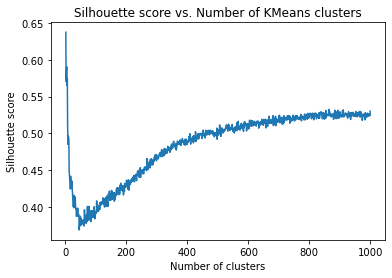

In [60]:
plot_values(ls, idx, "testcount1000") 

In [53]:
cluster_df, sil = cluster_df_loc(df_proc_clean, 5) 

In [56]:
cluster_df.to_csv("clusters5.csv", index=False)

In [2]:
clust = pd.read_csv("clusters5.csv")


In [3]:
clust.head(2)

,RUTA,ORDEN,CENEFA,TIPO (M/S),Módulo,Cantidad MM,Estado del Múltiple,NOMBRE,DIRECCIÓN BANDERA,LOCALIDAD,...,Total Homicidios,Total Lesiones Personales,Total Delitos Sexuales,Total Violencia intrafamiliar,Distance parques,Distance cais,Total Hurtos,count,Poblacion,cluster
0,10,ALI007,289A09,2,3,1,No Aplica,Br. La Paz,AV. C. de Cali - CL 61A Sur,Bosa,...,63.0,1005.0,216.0,1813.0,0.128853,0.573328,5522.0,1.0,673077.0,0
1,11,ESP001,291A10,2,3,1,No Aplica,Portal del Sur,Auto Sur - KR 74,Ciudad Bolívar,...,100.0,958.0,232.0,1295.0,1.018756,1.483017,4502.0,16.0,733859.0,0


In [6]:
def count_value(df, col='cluster'):
    """Count all different values in col in given dataframe df"""
    return df[col].value_counts()
    

In [7]:
count_value(clust)

4    1076
0     976
2     539
1     171
3      72
Name: cluster, dtype: int64

In [54]:
map_clusters(cluster_df, sil, 5)

<IPython.core.display.Javascript object>

FileNotFoundError: [Errno 2] No such file or directory: 'img/clusters-5-0.5905970168258824.png'

In [212]:
cluster_df.to_csv("cluster_df.csv", index=False)

In [1]:
df = pd.read_csv("cluster_df.csv")

C:\Users\ferreira\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ferreira\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\ferreira\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<IPython.core.display.Javascript object>

In [3]:
df.columns

Index(['RUTA', 'ORDEN', 'CENEFA', 'TIPO (M/S)', 'Módulo', 'Cantidad MM',
       'Estado del Múltiple', 'NOMBRE', 'DIRECCIÓN BANDERA', 'LOCALIDAD',
       'Consola', 'Panel', 'Audio', 'Longitud', 'Latitud', 'ZONAS (nueva)',
       'Total Homicidios', 'Total Lesiones Personales',
       'Total Delitos Sexuales', 'Total Violencia intrafamiliar',
       'Distance parques', 'Distance cais', 'Total Hurtos', 'Poblacion',
       'cluster'],
      dtype='object')

In [31]:
from pyproj import Transformer
import numpy as np 
import pandas as pd 


def make_lists(ls):
    """From ls given composed of tuples return two lists one of first item of each tuple and and the other one of the second item of each tuple"""
    return [list(t)[0] for t in ls], [list(t)[1] for t in ls]

def add_planas(df):
    lats = np.asarray(df['Latitud'])
    lons = np.asarray(df['Longitud'])

    transformer = Transformer.from_crs(4326, 3116)
    puntos = list(zip(lats, lons))


    nuevasCoordenadas = []
    for pt in transformer.itransform(puntos): 
        nuevasCoordenadas.append(pt)

    lats, lons = make_lists(nuevasCoordenadas)
    df["Lat"] = lats
    df["Lon"] = lons

    return df

In [39]:
import pyproj
print(pyproj.__version__)

3.1.0


In [32]:
newdf = add_planas(df)

## Coordinates visualization

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

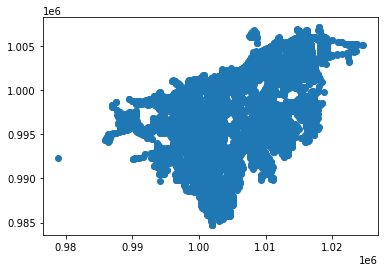

In [37]:
plt.scatter(newdf.Lat, newdf.Lon)